
<p align=center><img src=https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png><p>

**Se cargan las librerias a trabajar**

In [60]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


**Se cargan los Dataset train y test**

In [61]:

Df_hospitalizacion_train=pd.read_csv("https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_train.csv")
DF_test=pd.read_csv("https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_test.csv")

**Se da un vistazo a los dataframes**

In [62]:
#Train
Df_hospitalizacion_train.head(3)


,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7


In [63]:
#Vemos si el dataframe tienen valores nulos
Df_hospitalizacion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

**Se cambian los nombres de las columnas para tener mayor claridad**

In [64]:
Df_train=Df_hospitalizacion_train.copy()

In [65]:
Df_train=Df_train.rename(columns={"Available Extra Rooms in Hospital":"Habitaciones adicionales disponibles en el hospital",
                                                                "Department":"Área de atención",
                                                                "Ward_Facility_Code":"Código de habitacion",
                                                                "doctor_name":"Nombre del doctor a cargo del paciente",
                                                                "staff_available":"Personal disponible",
                                                                "patientid":"Identificador del paciente",
                                                                "Age":"Edad",
                                                                "gender":"Genero",
                                                                "Type of Admission":"Tipo de ingreso",
                                                                "Severity of Illness":"Gravedad de la enfermedad",
                                                                "health_conditions":"Condiciones de salud",
                                                                "Visitors with Patient":"Cantidad de visitantes",
                                                                "Insurance":"seguro de salud",
                                                                "Admission_Deposit":"Pagos_realizados_paciente",
                                                                "Stay (in days)":"Días registrados"})

In [66]:
DF_test=DF_test.rename(columns={"Available Extra Rooms in Hospital":"Habitaciones adicionales disponibles en el hospital",
                                                                "Department":"Área de atención",
                                                                "Ward_Facility_Code":"Código de habitacion",
                                                                "doctor_name":"Nombre del doctor a cargo del paciente",
                                                                "staff_available":"Personal disponible",
                                                                "patientid":"Identificador del paciente",
                                                                "Age":"Edad",
                                                                "gender":"Genero",
                                                                "Type of Admission":"Tipo de ingreso",
                                                                "Severity of Illness":"Gravedad de la enfermedad",
                                                                "health_conditions":"Condiciones de salud",
                                                                "Visitors with Patient":"Cantidad de visitantes",
                                                                "Insurance":"seguro de salud",
                                                                "Admission_Deposit":"Pagos_realizados_paciente"})

In [67]:
Df_train.head(3)

,Habitaciones adicionales disponibles en el hospital,Área de atención,Código de habitacion,Nombre del doctor a cargo del paciente,Personal disponible,Identificador del paciente,Edad,Genero,Tipo de ingreso,Gravedad de la enfermedad,Condiciones de salud,Cantidad de visitantes,seguro de salud,Pagos_realizados_paciente,Días registrados
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7


**Creamos una nueva feature llamada tipo_estancia**

In [68]:
Df_train["tipo_estancia"]=np.where(Df_train["Días registrados"]>8,1,0)

**Convertimos los datos de las features en valores numericos**

In [69]:
#Inicializamos 
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [70]:
Df_train["Área de atención"]=le.fit_transform(Df_train["Área de atención"])
Df_train["Nombre del doctor a cargo del paciente"]=le.fit_transform(Df_train["Nombre del doctor a cargo del paciente"])
Df_train["Edad"]=le.fit_transform(Df_train["Edad"])
Df_train["Edad"]=le.fit_transform(Df_train["Edad"])
Df_train["Genero"]=le.fit_transform(Df_train["Genero"])
Df_train["Tipo de ingreso"]=le.fit_transform(Df_train["Tipo de ingreso"])
Df_train["Gravedad de la enfermedad"]=le.fit_transform(Df_train["Gravedad de la enfermedad"])
Df_train["Condiciones de salud"]=le.fit_transform(Df_train["Condiciones de salud"])
Df_train["seguro de salud"]=le.fit_transform(Df_train["seguro de salud"])

In [71]:
Df_train.head(5)

,Habitaciones adicionales disponibles en el hospital,Área de atención,Código de habitacion,Nombre del doctor a cargo del paciente,Personal disponible,Identificador del paciente,Edad,Genero,Tipo de ingreso,Gravedad de la enfermedad,Condiciones de salud,Cantidad de visitantes,seguro de salud,Pagos_realizados_paciente,Días registrados,tipo_estancia
0,4,2,D,8,0,33070,4,0,1,0,1,4,1,2966.408696,8,0
1,4,2,B,8,2,34808,3,0,1,1,2,2,0,3554.835677,9,1
2,2,2,B,8,8,44577,2,0,1,0,1,2,1,5624.733654,7,0
3,4,2,D,4,7,3695,3,0,2,2,4,4,0,4814.149231,8,0
4,2,1,E,2,10,108956,7,1,1,2,1,2,0,5169.269637,34,1


## **Se crea una función para mostrar la correlacion en un heatmap**

In [72]:
corr=Df_train.corr()

C:\Users\casa\AppData\Local\Temp\ipykernel_13616\3913845386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=Df_train.corr()


<AxesSubplot: >

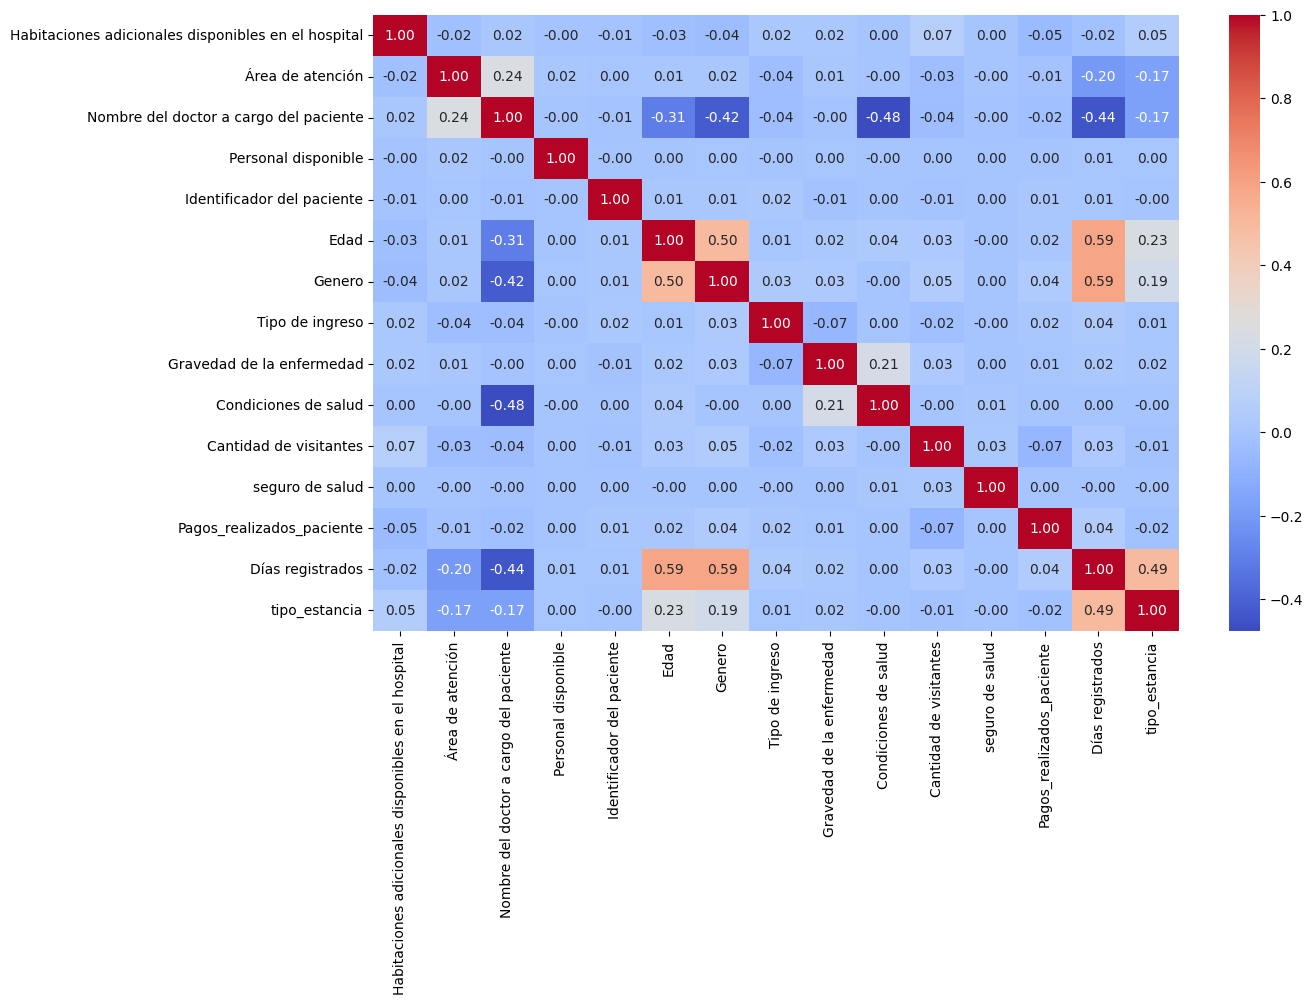

In [73]:
plt.figure(figsize=(13,8))
sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') #Graficamos las correlaciones con un mapa de calor

**Separamos el dataframe en atributos y etiquetas**

In [74]:
X=Df_train[["Área de atención","Nombre del doctor a cargo del paciente","Genero","Edad"]]

y=Df_train["tipo_estancia"]

In [75]:
#librerias necesarias para implementar el arbol de decisión.
from sklearn.tree import DecisionTreeClassifier

#Libreria para realizar la validacion cruzada.
from sklearn.model_selection import cross_validate 
from IPython.display import clear_output

## 
**Se hace una validación cruzada para escoger el hiperparametro del arbol de decisión**

In [76]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')



Completado: 100.0%


**Se grafica los datos obtenidos**

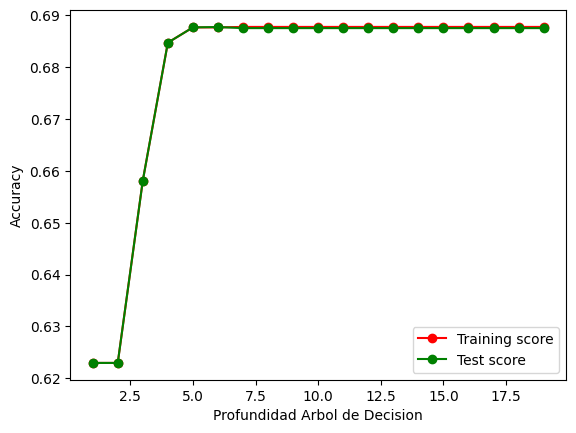

In [77]:
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

## **`Se crea el modelo`**


Gracias a la implementacion de la validación cruzada podemos obtener la mejor profundida para el modelo de arbol de decisión

In [78]:
X=Df_train[["Área de atención","Nombre del doctor a cargo del paciente","Genero","Edad"]]

y=Df_train["tipo_estancia"]

In [79]:
#Separamos el en datos de prueba y datos de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [80]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

mod_1= DecisionTreeClassifier(max_depth = 4, random_state = 42) 

In [81]:
# Entrenamos el modelo. Para ello, usamos nuestro set de entrenamiento

mod_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

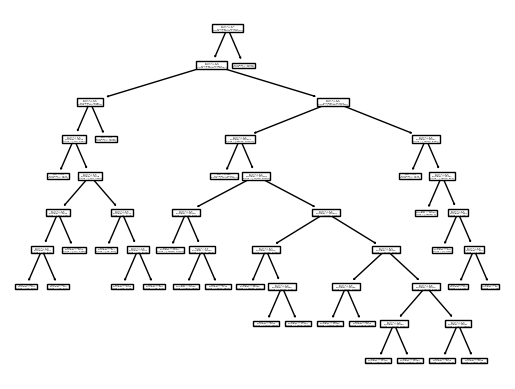

In [82]:
from sklearn import tree
#Graficamos el arbol
tree.plot_tree(clf.fit(X_train,y_train))
plt.show()

In [83]:
#Se observa la importancia de cada features en el modelo empleado
print(mod_1.feature_importances_)

[0.28424518 0.         0.         0.71575482]


**Se evalua el score del modelo**

In [84]:
from sklearn.metrics import accuracy_score

print('Precisión en el set de entrenamiento: {0: .2f}'.format(mod_1.score(X_train, y_train)))

Precisión en el set de entrenamiento:  0.68


In [86]:
#Predecimos el con el modelo creado
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = mod_1.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = mod_1.predict(X_test)

In [87]:
print(mod_1.feature_importances_)

[0.28424518 0.         0.         0.71575482]


In [91]:
exactitud = accuracy_score(y_test, y_test_pred)
exactitud

0.684219512195122

## **Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix

matrix_2 = confusion_matrix(y_test, y_test_pred)

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

GF_matrix_2 = ConfusionMatrixDisplay(matrix_2)

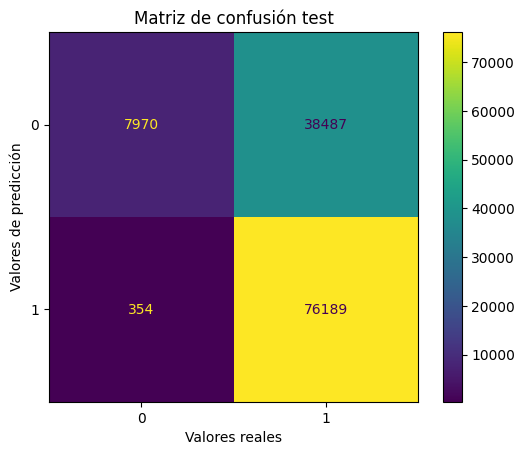

In [140]:
GF_matrix_2.plot()
plt.title("Matriz de confusión test")
plt.ylabel("Valores de predicción")
plt.xlabel("Valores reales")
plt.show()



In [141]:
TP=76189
FP=38487
FN=354
TN=7970

In [142]:
TP+FP+FN+TN

123000

## **Metricas**

**Exhaustividad (Recall)**

In [143]:
Recall=TP/(TP+FN)
Recall

0.9953751486092784

**Precisión (Accuracy)**

In [144]:
Accuracy=(TP+TN)/(TP+FP+FN+TN)
Accuracy

0.684219512195122

## **`Predicción`**

Se toma el dataframe creado al principio "DF_test" y se realiza la predicción con nuestro modelo.




In [153]:
#Se toman las features que aportan al modelo.

DF_test_1=DF_test[["Área de atención","Nombre del doctor a cargo del paciente","Genero","Edad"]]

In [154]:
#Convertimos los datos de las features en valores numericos
DF_test_1["Área de atención"]=le.fit_transform(DF_test_1["Área de atención"])
DF_test_1["Nombre del doctor a cargo del paciente"]=le.fit_transform(DF_test_1["Nombre del doctor a cargo del paciente"])
DF_test_1["Edad"]=le.fit_transform(DF_test_1["Edad"])
DF_test_1["Genero"]=le.fit_transform(DF_test_1["Genero"])


In [164]:
#Se definen las variables independientes

X_new=DF_test_1[["Área de atención","Nombre del doctor a cargo del paciente","Genero","Edad"]]

In [165]:
#predecimos con el modelo entrenado antiormente
y_pred_new= mod_1.predict(X_new)

In [173]:
prediccion=pd.DataFrame(y_pred_new.reshape(-1,1),columns=["pred"])
prediccion.head(5)

,pred
0,1
1,1
2,1
3,1
4,1


**Exportamos a csv**

In [175]:
prediccion.to_csv("Alvaro9721",index=False)